# 2. Data Cleaning and Imputation

## Missing Data

### Strategies for addressing missing data

- drop missing values: 5% or less of total values
- impute mean, median, mode
- impute by sub-group

It is important to deal with missing data before starting your analysis.

One approach is to drop missing values if they account for a small proportion, typically five percent, of your data.

Working with a dataset on plane ticket prices, stored as a pandas DataFrame called planes, you'll need to count the number of missing values across all columns, calculate five percent of all values, use this threshold to remove observations, and check how many missing values remain in the dataset.

In [1]:
import pandas as pd

In [5]:
planes = pd.read_csv('datasets/planes.csv')
planes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10660 entries, 0 to 10659
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10233 non-null  object 
 1   Date_of_Journey  10338 non-null  object 
 2   Source           10473 non-null  object 
 3   Destination      10313 non-null  object 
 4   Route            10404 non-null  object 
 5   Dep_Time         10400 non-null  object 
 6   Arrival_Time     10466 non-null  object 
 7   Duration         10446 non-null  object 
 8   Total_Stops      10448 non-null  object 
 9   Additional_Info  10071 non-null  object 
 10  Price            10044 non-null  float64
dtypes: float64(1), object(10)
memory usage: 916.2+ KB


In [3]:
# Print the number of missing values in each column of the DataFrame.

print(planes.isna().sum())

Airline            427
Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
dtype: int64


In [7]:
# Calculate how many observations five percent of the planes DataFrame is equal to.

# Find the five percent threshold
threshold = len(planes) * 0.05
print(threshold)

533.0


In [9]:
# Create cols_to_drop by applying boolean indexing to columns of the DataFrame with missing values less than or equal to the threshold.
cols_to_drop = planes.columns[planes.isna().sum() <= threshold]

# Use this filter to remove missing values and save the updated DataFrame.
# Drop missing values for columns below the threshold
planes.dropna(subset=cols_to_drop, inplace=True)

print(planes.isna().sum())

Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info    300
Price              368
dtype: int64


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
# Print the values and frequencies of "Additional_Info".

# Check the values of the Additional_Info column
print(planes['Additional_Info'].value_counts())

Additional_Info
No info                         6399
In-flight meal not included     1525
No check-in baggage included     258
1 Long layover                    14
Change airports                    7
No Info                            2
Business class                     1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64


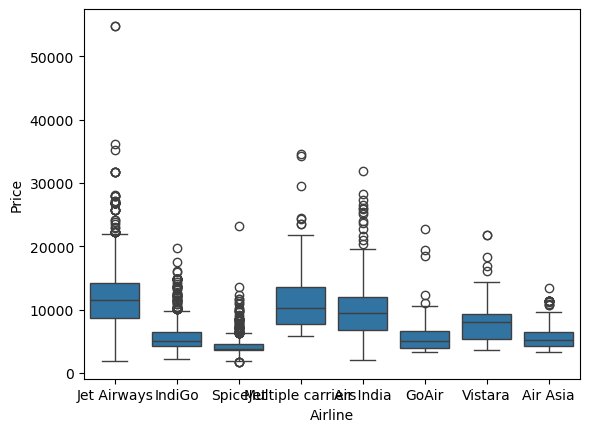

In [14]:
# Create a boxplot of "Price" versus "Airline".
# Create a box plot of Price by Airline
sns.boxplot(data=planes, x='Airline', y='Price')
plt.show()

In [15]:
# Now there's just one column with missing values left!

# You've removed the "Additional_Info" column from planes—the last step is to impute the missing data in the "Price" column of the dataset.

# As a reminder, you generated this boxplot, which suggested that imputing the median price based on the "Airline" is a solid approach!

planes = planes.drop(columns=['Additional_Info'])


# Group planes by airline and calculate the median price.
# Calculate median plane ticket prices by Airline
airline_prices = planes.groupby("Airline")["Price"].median()

print(airline_prices)

Airline
Air Asia              5192.0
Air India             9443.0
GoAir                 5003.5
IndiGo                5054.0
Jet Airways          11507.0
Multiple carriers    10197.0
SpiceJet              3873.0
Vistara               8028.0
Name: Price, dtype: float64


In [16]:
# Convert the grouped median prices to a dictionary.

prices_dict = airline_prices.to_dict()

In [17]:
# Conditionally impute missing values for "Price" by mapping values in the "Airline" column based on prices_dict.
# Check for remaining missing values.

# Map the dictionary to missing values of Price by Airline
planes["Price"] = planes["Price"].fillna(planes["Airline"].map(prices_dict))

# Check for missing values
print(planes.isna().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Price              0
dtype: int64
